In [1]:
import OpenEXR as exr
import numpy as np
import Imath

In [2]:
def extract_rgb_depth(filename):
    exrfile = exr.InputFile(filename)
    header = exrfile.header()
    dw = header['dataWindow']
    isize = (dw.max.y - dw.min.y + 1, dw.max.x - dw.min.x + 1)
    channelData = dict()
    for c in header['channels']:
        C = exrfile.channel(c, Imath.PixelType(Imath.PixelType.FLOAT))
        C = np.frombuffer(C, dtype=np.float32)
        C = np.reshape(C, isize)
        
        channelData[c] = C
    depth = channelData['Z']
    colorChannels = ['R', 'G', 'B', 'A'] if 'A' in header['channels'] else ['R', 'G', 'B']
    img = np.concatenate([channelData[c][...,np.newaxis] for c in colorChannels], axis=2)

    # linear to standard RGB
    img[..., :3] = np.where(img[..., :3] <= 0.0031308,
                                12.92 * img[..., :3],
                                1.055 * np.power(img[..., :3], 1 / 2.4) - 0.055)

    # sanitize image to be in range [0, 1]
    img = np.where(img < 0.0, 0.0, np.where(img > 1.0, 1, img))
    
    return img, depth

In [3]:
path = "../output/images/"
image_prefix = "CLEVR_new_000000"
exrfile = exr.InputFile(path+image_prefix+"camera_ori.exr")
header = exrfile.header()
dw = header['dataWindow']
isize = (dw.max.y - dw.min.y + 1, dw.max.x - dw.min.x + 1)
channelData = dict()
for c in header['channels']:
    C = exrfile.channel(c, Imath.PixelType(Imath.PixelType.FLOAT))
    C = np.frombuffer(C, dtype=np.float32)
    C = np.reshape(C, isize)
        
    channelData[c] = C

In [4]:
depth = channelData['Z']
print(np.unique(depth))

[11.489187 11.489218 11.489219 ... 30.058804 30.071314 30.071325]


In [5]:
colorChannels = ['R', 'G', 'B', 'A'] if 'A' in header['channels'] else ['R', 'G', 'B']
img = np.concatenate([channelData[c][...,np.newaxis] for c in colorChannels], axis=2)
    
# linear to standard RGB
img[..., :3] = np.where(img[..., :3] <= 0.0031308,
                            12.92 * img[..., :3],
                            1.055 * np.power(img[..., :3], 1 / 2.4) - 0.055)
    
# sanitize image to be in range [0, 1]
img = np.where(img < 0.0, 0.0, np.where(img > 1.0, 1, img))

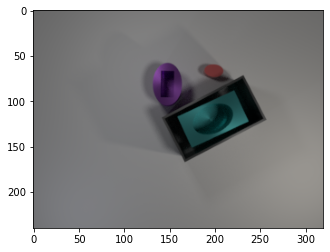

In [12]:
from matplotlib.pyplot import imshow
path = "../output/images/"
image_prefix = "CLEVR_new_000005"
img, depth = extract_rgb_depth(path+image_prefix+"camera_top.exr")
imshow(img)

In [59]:
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow

savepath = "../output/demo/images/"
depthpath = "../output/demo/depth/"
for i in range(20):
    if i >= 10:
        image_prefix = "CLEVR_new_0000" + str(i)
    else:
        image_prefix = "CLEVR_new_00000" + str(i)
    img, depth = extract_rgb_depth(path+image_prefix+"camera_top.exr")
    Image.fromarray(np.uint8(img*255)).save(savepath+image_prefix+"camera_top.png")
    np.save(depthpath+image_prefix+"camera_top_depth", depth)
    img, depth = extract_rgb_depth(path+image_prefix+"camera_ori.exr")
    Image.fromarray(np.uint8(img*255)).save(savepath+image_prefix+"camera_ori.png")
    np.save(depthpath+image_prefix+"camera_ori_depth", depth)

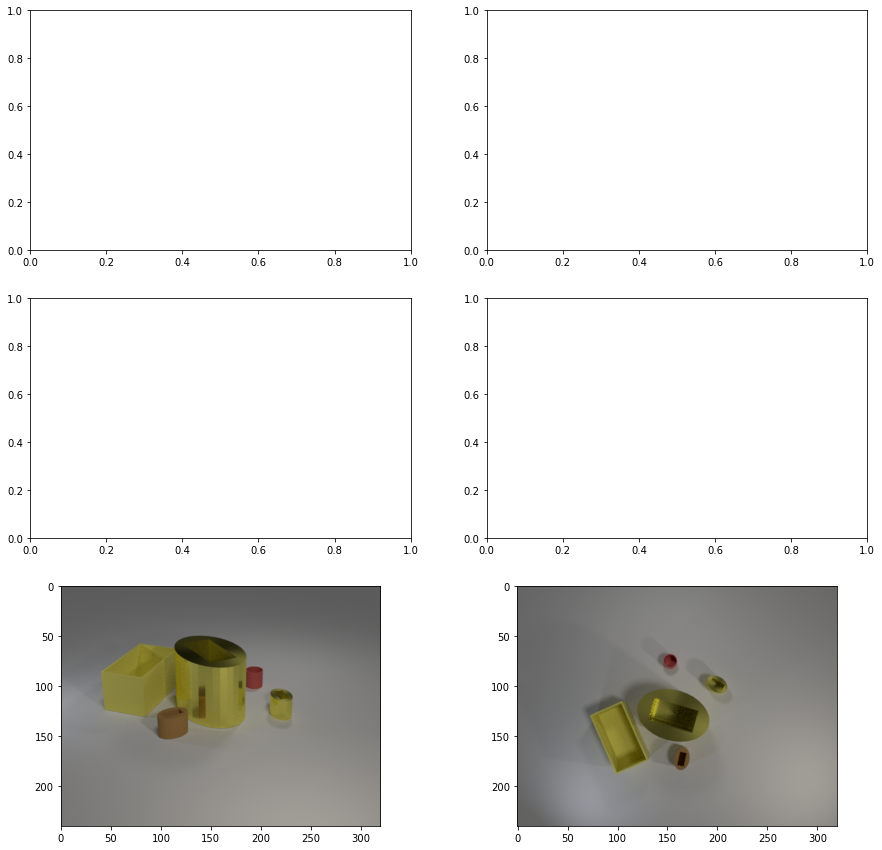

In [59]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(3,2)
fig.set_size_inches(15, 15)
# img, depth = extract_rgb_depth(path+image_prefix+"camera1.exr")
# ax[0,0].imshow(img)
# img, depth = extract_rgb_depth(path+image_prefix+"camera2.exr")
# ax[0,1].imshow(img)
# img, depth = extract_rgb_depth(path+image_prefix+"camera3.exr")
# ax[1,0].imshow(img)
# img, depth = extract_rgb_depth(path+image_prefix+"camera4.exr")
# ax[1,1].imshow(img)
img, depth = extract_rgb_depth(path+image_prefix+"camera_ori.exr")
ax[2,0].imshow(img)
img, depth = extract_rgb_depth(path+image_prefix+"camera_top.exr")
ax[2,1].imshow(img)

In [47]:
image = img
arr = np.array(depth)
print(arr.shape)
print(arr)
print(image)
print(image.shape)
print(np.unique(image[:,:,3]))

(240, 320)
[[14.959881  14.94521   14.930618  ... 14.930634  14.945226  14.959896 ]
 [14.948903  14.934221  14.919619  ... 14.919634  14.934237  14.948918 ]
 [14.938008  14.923317  14.908703  ... 14.908719  14.923332  14.938024 ]
 ...
 [14.937997  14.9233055 14.908691  ... 14.908708  14.923321  14.938012 ]
 [14.948891  14.93421   14.919607  ... 14.919622  14.934225  14.948906 ]
 [14.959869  14.945199  14.930607  ... 14.930622  14.945214  14.959884 ]]
[[[0.39569652 0.3952523  0.3943599  1.        ]
  [0.39576226 0.39532164 0.3946829  1.        ]
  [0.3955263  0.39513728 0.39508015 1.        ]
  ...
  [0.41383362 0.4115063  0.40763837 1.        ]
  [0.41412562 0.4118109  0.4078584  1.        ]
  [0.4138909  0.41151202 0.4071656  1.        ]]

 [[0.39485452 0.39447033 0.39442042 1.        ]
  [0.3961933  0.39574173 0.39498863 1.        ]
  [0.3958401  0.39545515 0.3954148  1.        ]
  ...
  [0.41631597 0.41387013 0.40857562 1.        ]
  [0.4140081  0.41168556 0.40779278 1.        ]
  [

In [48]:
img, depth = extract_rgb_depth(path+image_prefix+"camera3.exr")

In [49]:
image = img[:,:,:3]
image = (image*255).astype(np.uint8)
png = Image.fromarray(image, 'RGB')
png.save(path+image_prefix+"camera3.png")

In [50]:
arr = np.array(depth)
np.savez_compressed(image_prefix+'camera3', arr)

In [51]:
depthpng = Image.fromarray(depth, 'L')
depthpng.save(path+image_prefix+"camera3depth.png")

In [52]:
combined = img
combined = (combined*255).astype(np.uint8)
combined[:,:,3] = depth
png = Image.fromarray(combined, 'RGBA')
png.save(path+image_prefix+"camera3combined.png")

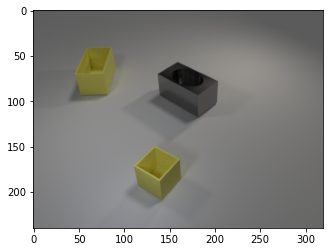

In [53]:
pngfile = Image.open(path+image_prefix+"camera3.png")
arrpng = np.array(pngfile)
imshow(arrpng)

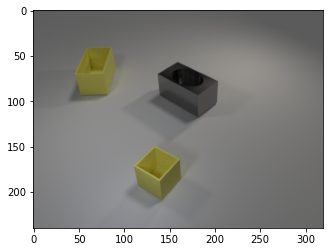

In [54]:
pngfile = Image.open(path+image_prefix+"camera3combined.png")
arrpng = np.array(pngfile)[:,:,0:3]
imshow(arrpng)

In [55]:
#depthinfo = np.load(path+image_prefix+'camera3.npy')
#print(depthinfo)

FileNotFoundError: [Errno 2] No such file or directory: '../output/images/CLEVR_new_000000camera3.npy'

In [ ]:
print(depth[150, 100])
print(depth[10, 150])

In [ ]:
import open3d as o3d
from open3d import *

In [ ]:
# depth = depth/12.86423

In [ ]:
depth = np.where(depth > 1.2864231e+01, 1.2864231e+01, depth)
print(np.unique(depth))

In [ ]:
pin = o3d.camera.PinholeCameraIntrinsic(320, 240, 526.37, 526.37, 160, 120)
img = o3d.geometry.Image(depth)
pcd = o3d.geometry.PointCloud
pcd = pcd.create_from_depth_image(img, pin, depth_scale = 1000)

In [ ]:
def set_camera_params(obj_cam):
    #Pointer to camera data
    cam = obj_cam.data
    cam.name = 'MyCam'
    cam.type = 'PERSP'
    cam.lens_unit = 'FOV'
    #From Kinect default camera params    
    fx = 526.370
    fy = 526.370
    ppx = 313.68782938
    ppy = 259.01834898
    #Horizontal camera angle
    cam.angle_x=58.5*3.1415/180 #2*math.atan(0.5*render.resolution_x/fx);
    cam.clip_start = 0.0
    cam.clip_end = 5000
    return

In [ ]:
# downpcd = pcd.voxel_down_sample(voxel_size=0.05)
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

In [ ]:
downpcd = pcd.voxel_down_sample(voxel_size=0.05)
print(np.asarray(downpcd.points))
print(np.asarray(pcd.points))

In [ ]:
pcd.points = o3d.utility.Vector3dVector(image)

In [ ]:
print(depth.dtype)
print(xyz.dtype)

In [ ]:
o3d.visualization.draw_geometries([pcd])

In [ ]:
pin = o3d.camera.PinholeCameraIntrinsic(640, 480, 35, 35, 320, 240)
img = o3d.geometry.Image(depth)
pcd = o3d.geometry.PointCloud
rgb = o3d.geometry.Image(image[:,:,0:3])
rgbd = o3d.geometry.RGBDImage
rgbd = rgbd.create_from_color_and_depth(rgb, img)
pcd = pcd.create_from_rgbd_image(rgbd, pin, depth_scale = 1000)

In [ ]:
pcd = o3d.io.read_point_cloud("simpleDepth3.pcd")
print(pcd)
print(np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

In [ ]:
import PIL
from PIL import Image
image2 = (image*255).astype(np.uint8)
color = Image.fromarray(image2[:,:,:3])
depth = Image.fromarray(image2[:,:,3])

In [ ]:
rgbd = rgbd.create_from_color_and_depth(color, depth)
pcd = pcd.create_from_rgbd_image(rgbd, pin, depth_scale = 1000)
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])